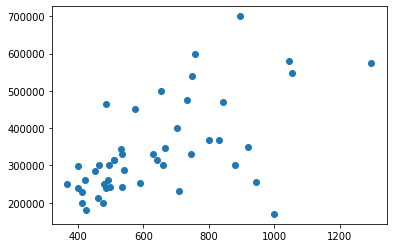

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

size=np.loadtxt("ex1data2.txt",delimiter=",",dtype=int,usecols=(0,))
rooms=np.loadtxt("ex1data2.txt",delimiter=",",dtype=int,usecols=(1,))
price=np.loadtxt("ex1data2.txt",delimiter=",",dtype=int,usecols=(2,))
plt.scatter(size/rooms,price)
plt.show()

In [4]:
len(price)

47

In [5]:
def model(a, b, x):
    return a*x + b
def cost_function(a, b, x, y):
    n = 47
    return 0.5/n * (np.square(y-a*x-b)).sum()
def optimize(a,b,x,y):
    n = 47
    alpha = 1e-1
    y_hat = model(a,b,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    a = a - alpha*da
    b = b - alpha*db
    return a, b

In [6]:
from sklearn.model_selection import train_test_split
dataset = [(i,j) for i,j in zip(size/rooms,price)] #整合
# print(dataset)
train_selt,test_set=train_test_split(dataset,test_size=0.2,random_state=30)
trainX = np.array([i for i,j in train_selt]).reshape(-1,1)
trainY = np.array([j for i,j in train_selt]).reshape(-1,1)
testX = np.array([i for i,j in test_set]).reshape(-1,1)
testY = np.array([j for i,j in test_set]).reshape(-1,1)

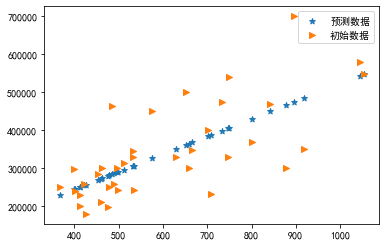

In [7]:
from sklearn import linear_model
# 构造线性回归器
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(trainX,trainY)
# 此处预测trainX
y_predict = linear_regressor.predict(trainX)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.scatter(trainX,y_predict,marker='*',label='预测数据')
plt.scatter(trainX,trainY,marker='>',label='初始数据')
plt.legend()

In [8]:
from sklearn import metrics
print('平均绝对误差:{}'.format(metrics.mean_absolute_error(y_predict,trainY)))
print('均方差:{}'.format(metrics.mean_squared_error(y_predict,trainY)))
print('解释方差分:{}'.format(metrics.explained_variance_score(y_predict,trainY)))
print('R2得分:{}'.format(metrics.r2_score(y_predict,trainY)))

平均绝对误差:62961.559001845795
均方差:7083426842.876852
解释方差分:0.05251800167006304
R2得分:0.05251800167006293


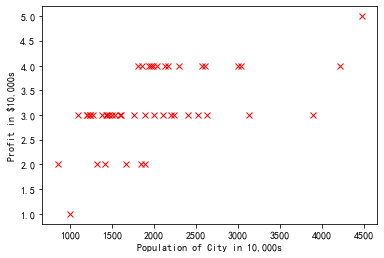

C:\Users\Ciaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


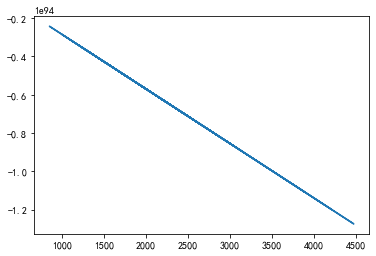

[[-1.23126941e+87]
 [-2.84378032e+90]]
[[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def computeCost(X,y,theta):
    m=np.size(X[:0])
    J= (2*m)*np.sum((np.dot(X,theta)-y)**2)
    return 1.0/J

data=np.loadtxt('ex1data2.txt',delimiter=",",dtype="float")
m=np.size(data[:,0])

X=data[:,0:1]
y=data[:,1:2]
plt.plot(X,y,"rx")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

one=np.ones(m)
X=np.insert(X,0,values=one,axis=1)

theta=np.zeros((2,1))
iterations=20
alpha=0.01

J_history = np.zeros((iterations,1))
for iter in range(0,iterations):
    theta=theta-alpha/m*np.dot(X.T,(np.dot(X,theta)-y))
    J_history[iter]=computeCost(X,y,theta)
    
plt.plot(data[:,0],np.dot(X,theta),'-')
plt.show()

print(theta)
print(J_history)

In [11]:
print(J_history)

[[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]


[[-1.08439487e-16  8.84765988e-01 -5.31788197e-02]]


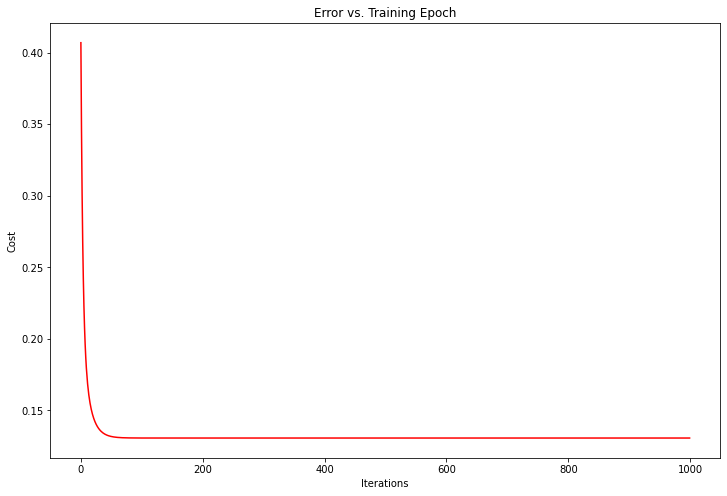

In [2]:
def computeCost(X, y, theta):#代价函数 最小二乘法
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))
def gradientDescent(X,y,theta,alpha,iters): #梯度下降函数
    tmp = np.matrix(np.zeros(theta.shape)) 
    cost = np.zeros(iters) 
    m = X.shape[0]
    for i in range(iters): 
        tmp = theta - ( alpha / m )*( X * theta.T - y ).T * X
        #X（97，2），theta.T（2，1），y（97，1）
        theta = tmp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

path = 'ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['size','bedrooms','Price'])
data2.head()

data2 = (data2 - data2.mean()) / data2.std()
data2.head()

data2.insert(0, 'ones', 1)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta= np.matrix(np.array([0,0,0]))

iters= 1000
alpha= 0.1
final_theta,cost2 = gradientDescent(X2,y2,theta,alpha,iters)
computeCost(X2,y2,final_theta) #0.13068648053904197
print(final_theta)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()